<a href="https://colab.research.google.com/github/WHU-Peter/COMP6247-Reinforcement-and-Online-Learning/blob/main/Assignment1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

seed = 7
np.random.seed(seed)

In [ ]:
def sigmoid(theta, x):
  return 1 / (1 + np.exp(-(x @ theta.T)))

[ 4. -4.]
(2000, 2)
(2000,)


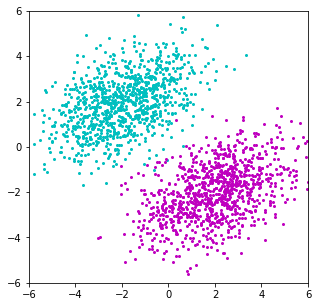

In [ ]:
# 每个分类样本数量
N = 1000

# 初始化高斯分布的均值和协方差
alpha = 2
u1 = np.array([-alpha, alpha])
u2 = np.array([alpha, -alpha])
C1 = np.array([[2, 1], [1, 2]])
C2 = C1

# 根据高斯线性判别分析得知真实分界线的theta
theta = (np.linalg.inv(C2) @ u2 - np.linalg.inv(C1) @ u1)
print(theta)

# 生成数据
A = np.linalg.cholesky(C1)
X1 = np.random.randn(N, 2)
X1 = X1 @ A
X1 = X1 + u1

X2 = np.random.randn(N, 2)
X2 = X2 @ A
X2 = X2 + u2

ex = np.random.randn(N)
Y1 = sigmoid(theta, X1) + 0.001*ex

ex = np.random.randn(N)
Y2 = sigmoid(theta, X2) + 0.001*ex

X = np.append(X1, X2, axis=0)
Y = np.append(Y1, Y2, axis=0)

shuffle_indexes = np.random.permutation(2*N)
X = X[shuffle_indexes]
Y = Y[shuffle_indexes]
print(X.shape)
print(Y.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.show()

Text(0.5, 1.0, 'theta parameters 2')

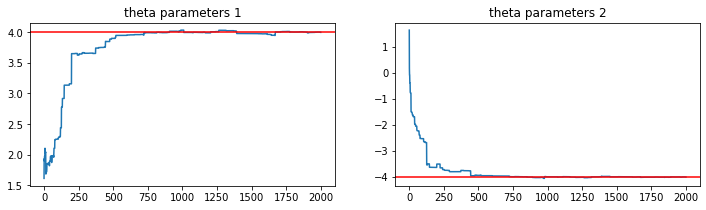

In [ ]:
def extendedKalmanFilter(x, y, Q, R, th_n1_n1, P_n1_n1):

    th_conv = np.zeros([2, 2*N])

    for n in range(0, 2*N):
      xn = x[n].reshape((2, 1))
      # Prediction of state and covariance
      th_n_n1 = th_n1_n1.copy()
      P_n_n1 = P_n1_n1 + Q
      yh = sigmoid(th_n_n1.T, xn.T)
      en = y[n] - yh
      # 将更新过程中的sigmoid转化为线性映射, Sigmoid函数f(x)的导数=f(x)(1-f(x))
      xn = xn.reshape((2, 1))
      H = yh*(1-yh)*xn
      # Kalman gain (kn) and innovation variance (den)
      den = H.T @ P_n_n1 @ H + R
      kn = P_n_n1 @ H @ np.linalg.inv(den)
      # Posterior update
      th_n_n = th_n_n1 + kn * en
      P_n_n = (np.eye(2) - kn @ H.T) @ P_n_n1
      # Save
      th_conv[0,n] = th_n_n[0]
      th_conv[1,n] = th_n_n[1]
      # Remember for next step
      th_n1_n1 = th_n_n.copy()
      P_n1_n1 = P_n_n.copy()
    return th_conv

beta = 0.01
Q = beta*np.eye(2)
R = 0.001
th_n1_n1 = np.random.randn(2,1)
P_n1_n1 = 0.01*np.eye(2)
th_conv_constant = extendedKalmanFilter(X, Y, Q, R, th_n1_n1, P_n1_n1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
ax[0].plot(th_conv_constant[0])
ax[0].axhline(y=theta[0], color='r')
ax[0].set_title("theta parameters 1" )
ax[1].plot(th_conv_constant[1])
ax[1].axhline(y=theta[1], color='r')
ax[1].set_title("theta parameters 2")